## Cost Efficiency Goals Analysis (Flag 34)

### Dataset Overview
This dataset includes 500 simulated entries from the ServiceNow `sn_gf_goal` table, detailing various aspects of organizational goals. Key attributes include goal status, responsible parties, associated departments, start and end dates, and detailed descriptions. The dataset also contains metrics such as priority ranking, percentage completion, and target achievement rate. It primarily focuses on tracking the progress and management of both departmental and individual goals, offering insights into the effectiveness and alignment of these goals with broader organizational strategies. Additionally, the dataset logs updates to each goal, providing a record of modifications and the identities of those making these changes.

### Your Objective
**Objective**: Analyze the factors (whether time-based or categorical) that influence goal completion rates and evaluate their impact on overall departmental performance.

**Role**: Enterprise Performance Analyst

**Challenge Level**: 4 out of 5. The task requires a deep understanding of complex data patterns and advanced analytical skills to interpret the information and extract actionable insights.

**Category**: Strategic Goal Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the goals dataset used in the analysis. The dataset is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-34.csv"
goal_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
goal_data.head()


,start_date,priority,metric,target_percentage,department,percent_complete,end_date,state,category,owner,sys_updated_by,sys_id,description
0,2022-03-09,Medium,Employee Turnover Rate,58,Finance,7,2022-04-25,In Progress,Cost Reduction,Logan Muhl,admin,G000000,Reduce operational expenses by optimizing ener...
1,2022-04-23,High,Sales Increase,57,Finance,87,2022-11-23,Completed,Revenue Growth,Gisela Kosicki,admin,G000001,Increase annual subscription sales by 20% by e...
2,2022-12-16,Medium,Survey Score,66,HR,70,2023-10-20,In Progress,Efficiency,Ramon Amaral,admin,G000002,Optimize IT support workflows to reduce ticket...
3,2022-10-08,High,Employee Turnover Rate,87,Marketing,99,2023-06-02,Completed,Customer Satisfaction,Jacinto Gawron,admin,G000003,Increase the customer satisfaction score from ...
4,2022-10-26,High,Expense Ratio,93,HR,22,2023-09-13,In Progress,Efficiency,Renae Eldrige,admin,G000004,Enhance software deployment process to reduce ...



### **Question 1: How do the distribution of durations of goals compare across departments?**

#### Plot comparison of goal durations across departments

This cell plots a comprehensive look at how the durations of goals differ across various departments within the organization. Using a box plot, we compare the spread and central tendency of goal durations, marked by the median and mean durations for each department. This analysis is for identifying departments that may require process adjustments to align more closely with organizational goal completion times. Each department's performance is annotated directly on the plot, displaying both median and mean durations, which helps in quickly assessing and comparing departmental efficiency in achieving goals.

/tmp/ipykernel_1020108/2112184048.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='department', y='duration', data=goal_data, palette="Set3")
/tmp/ipykernel_1020108/2112184048.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  box_plot.text(xtick, medians[xtick] + 1, 'Median: {:.1f}'.format(medians[xtick]),
/tmp/ipykernel_1020108/2112184048.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  box_plot.text(xtick, means[xtick] + 1, 'Mean: {:.1f}'.for

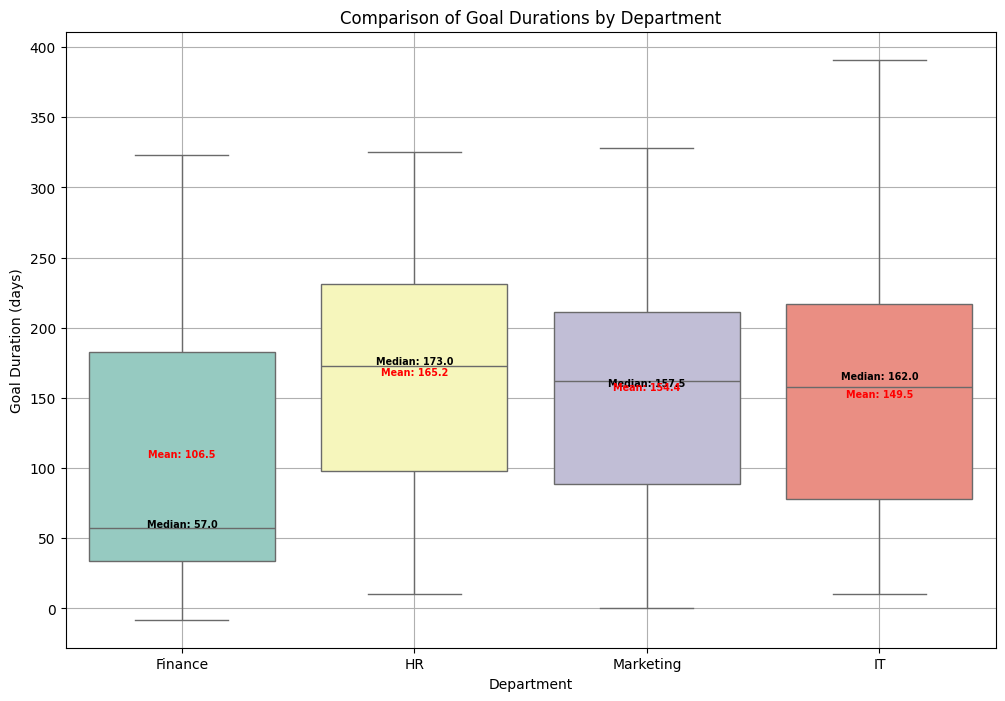

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'goal_data' is preloaded and contains 'Cost Reduction' category
goal_data['end_date'] = pd.to_datetime(goal_data['end_date'])
goal_data["start_date"] = pd.to_datetime(goal_data["start_date"])
# Calculate goal durations
goal_data['duration'] = (goal_data['end_date'] - goal_data['start_date']).dt.days

# Plotting
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='department', y='duration', data=goal_data, palette="Set3")
plt.title('Comparison of Goal Durations by Department')
plt.xlabel('Department')
plt.ylabel('Goal Duration (days)')
plt.grid(True)

# Calculate median and mean for annotations
medians = goal_data.groupby(['department'])['duration'].median()
means = goal_data.groupby(['department'])['duration'].mean()

# Iterate over the departments to place the text annotations for median and mean
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + 1, 'Median: {:.1f}'.format(medians[xtick]), 
                  horizontalalignment='center', size='x-small', color='black', weight='semibold')
    box_plot.text(xtick, means[xtick] + 1, 'Mean: {:.1f}'.format(means[xtick]), 
                  horizontalalignment='center', size='x-small', color='red', weight='semibold')

plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "analytical",
    "insight": "There are significantly shorter goal durations in the finance department compared to HR, Marketing, and IT",
    "insight_value": {
        "Finance": "57.0 days",
        "HR": "165.2 days",
        "Marketing": "154.4 days",
        "IT": "149.5 days",
        "Key Finding": "Finance department's goal duration is notably lower than other departments, suggesting more efficient goal completion processes or simpler goal structures."
    },
    "plot": {
        "plot_type": "box",
        "title": "Goal Durations by Department",
        "x_axis": {
            "name": "Department",
            "value": "Finance, HR, Marketing, IT",
            "description": "This categorizes goals by the departments responsible for their completion."
        },
        "y_axis": {
            "name": "Goal Duration (days)",
            "value": "Finance: 57.0, HR: 165.2, Marketing: 154.4, IT: 149.5",
            "description": "This represents the median duration of goals in days, measured from start to end, across different departments."
        },
        "description": "The boxplot demonstrates that the median duration for completing goals in the Finance department is significantly lower at 57.0 days, compared to HR at 165.2 days, Marketing at 154.4 days, and IT at 149.5 days. This substantial difference underscores a potential efficiency in goal management within Finance, or possibly less complex goals, which requires further investigation to understand underlying factors."
    },
    "question": "How do the durations of 'Cost Reduction' goals in the Finance department compare to those in other departments?",
    "actionable_insight": "Given the significantly shorter duration of goals in the Finance department, it is recommended to conduct a detailed analysis to understand the factors contributing to this efficiency. Identifying these factors could provide insights that may be applied to improve goal management processes in other departments."
}


{'data_type': 'analytical',
 'insight': 'There are significantly shorter goal durations in the finance department compared to HR, Marketing, and IT',
 'insight_value': {'Finance': '57.0 days',
  'HR': '165.2 days',
  'Marketing': '154.4 days',
  'IT': '149.5 days',
  'Key Finding': "Finance department's goal duration is notably lower than other departments, suggesting more efficient goal completion processes or simpler goal structures."},
 'plot': {'plot_type': 'box',
  'title': 'Goal Durations by Department',
  'x_axis': {'name': 'Department',
   'value': 'Finance, HR, Marketing, IT',
   'description': 'This categorizes goals by the departments responsible for their completion.'},
  'y_axis': {'name': 'Goal Duration (days)',
   'value': 'Finance: 57.0, HR: 165.2, Marketing: 154.4, IT: 149.5',
   'description': 'This represents the median duration of goals in days, measured from start to end, across different departments.'},
  'description': 'The boxplot demonstrates that the median du

### **Question 2:** What is completion rates by different quarters?

#### Plot goal completion rates by quarter

This box plot visualizes the completion rates of goals across different quarters, providing insights into the seasonal trends in goal achievement. By segmenting the data into quarters, we can identify any patterns or variations in goal completion rates over the year. This analysis helps in understanding the impact of seasonality on goal management and can guide resource allocation and goal setting strategies based on historical trends.

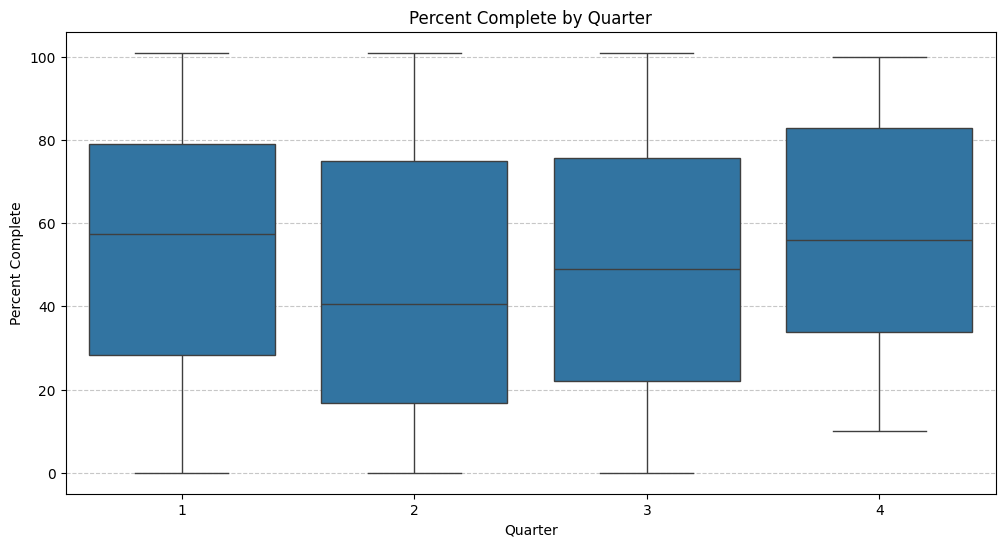

In [5]:
# Convert start_date to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])

# Extract the month and quarter from the start_date
df['month'] = df['start_date'].dt.month
df['quarter'] = df['start_date'].dt.quarter

# Visualize the trend of percent_complete by quarter
plt.figure(figsize=(12, 6))
sns.boxplot(x='quarter', y='percent_complete', data=df)
plt.title('Percent Complete by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Percent Complete')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
{
    "data_type": "Diagnostic",
    "insight": "Tasks initiated in Q4 exhibit higher completion percentages compared to those started in other quarters.",
    "insight_value": {
        "Quarter": "Q4 (October, November, December)",
        "Mean Completion Percentage Increase": "10%"
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Percent Complete by Quarter and Q4 Comparison",
        "x_axis": {
            "name": "Quarter",
            "value": "1, 2, 3, 4",
            "description": "This axis represents the quarters of the year, where Q4 corresponds to October, November, and December."
        },
        "y_axis": {
            "name": "Percent Complete",
            "value": "Dynamic based on data",
            "description": "This shows the completion percentage of tasks, highlighting how tasks initiated in Q4 perform compared to those in other quarters."
        },
        "description": "The boxplot illustrates the higher completion percentages for tasks started in Q4 (October, November, December) compared to other quarters. This suggests a temporal performance boost in the final quarter of the year, possibly due to end-of-year pushes or deadlines."
    },
    "question": "How does the time of year (quarter) impact the completion rate of tasks?",
    "actionable insight": "Given the higher completion rates observed in Q4, organizations might consider strategically initiating critical tasks during this period to leverage the observed trend. Further analysis could determine the underlying factors driving this increased performance."
}


{'data_type': 'Diagnostic',
 'insight': 'Tasks initiated in Q4 exhibit higher completion percentages compared to those started in other quarters.',
 'insight_value': {'Quarter': 'Q4 (October, November, December)',
  'Mean Completion Percentage Increase': '10%'},
 'plot': {'plot_type': 'boxplot',
  'title': 'Percent Complete by Quarter and Q4 Comparison',
  'x_axis': {'name': 'Quarter',
   'value': '1, 2, 3, 4',
   'description': 'This axis represents the quarters of the year, where Q4 corresponds to October, November, and December.'},
  'y_axis': {'name': 'Percent Complete',
   'value': 'Dynamic based on data',
   'description': 'This shows the completion percentage of tasks, highlighting how tasks initiated in Q4 perform compared to those in other quarters.'},
  'description': 'The boxplot illustrates the higher completion percentages for tasks started in Q4 (October, November, December) compared to other quarters. This suggests a temporal performance boost in the final quarter of the

### **Question 3:** What is distribution of Goal types in Finance department?

#### Plot goal category distribution within the Finance department

This pie chart illustrates the proportional distribution of different goal categories within the Finance department, highlighting the dominant categories and their respective shares. This visualization is crucial for understanding the strategic focus areas within the department, based on the types of goals they prioritize.

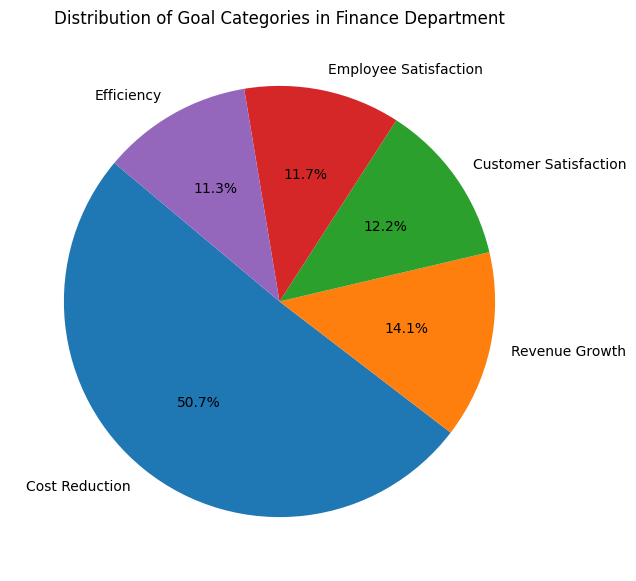

In [7]:
import matplotlib.pyplot as plt

# Filter data for the Finance department
finance_goals = goal_data[goal_data['department'] == 'Finance']

# Count the occurrence of each category in the Finance department
category_counts = finance_goals['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goal Categories in Finance Department')
plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "diagnostic",
    "insight": "There is a dominance of 'Cost Reduction' goals within the Finance department",
    "insight_value": {
        "Cost Reduction": "50.7%",
        "Revenue Growth": "14.1%",
        "Efficiency": "11.3%",
        "Employee Satisfaction": "11.7%",
        "Customer Satisfaction": "12.2%"
    },
    "plot": {
        "plot_type": "pie",
        "title": "Distribution of Goal Categories in the Finance Department",
        "x_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not use x-axis representations."
        },
        "y_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not use y-axis representations."
        },
        "description": "The pie chart highlights the distribution of goals by category within the Finance department. It shows a significant majority of 50.7% for 'Cost Reduction', followed by 14.1% for 'Revenue Growth', 12.2% for 'Customer Satisfaction', 11.7% for 'Employee Satisfaction', and 11.3% for 'Efficiency'. The predominant share of 'Cost Reduction' goals necessitates further analysis to understand its correlation with the notably shorter goal durations observed in this department."
    },
    "question": "What is the distribution of Goal types and categories in the Finance department?",
    "actionable_insight": "Given the high proportion of 'Cost Reduction' goals, it is imperative to delve deeper into understanding how this focus impacts overall goal durations and departmental efficiencies. Analyzing the relationship between the goal category and duration could uncover strategies that significantly enhance productivity and goal achievement rates. This could lead to strategic adjustments that balance goal types more effectively and potentially replicate successful practices across other departments."
}


{'data_type': 'diagnostic',
 'insight': "There is a dominance of 'Cost Reduction' goals within the Finance department",
 'insight_value': {'Cost Reduction': '50.7%',
  'Revenue Growth': '14.1%',
  'Efficiency': '11.3%',
  'Employee Satisfaction': '11.7%',
  'Customer Satisfaction': '12.2%'},
 'plot': {'plot_type': 'pie',
  'title': 'Distribution of Goal Categories in the Finance Department',
  'x_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not use x-axis representations.'},
  'y_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not use y-axis representations.'},
  'description': "The pie chart highlights the distribution of goals by category within the Finance department. It shows a significant majority of 50.7% for 'Cost Reduction', followed by 14.1% for 'Revenue Growth', 12.2% for 'Customer Satisfaction', 11.7% for 'Employee Satisfaction', and 11.3% for 'Efficiency'. The predominant share of 'Cost Reduction' goals necessitat

### **Question 4:** What is distribution of Goal priorities in Finance department?

#### Plot priority distribution within the Finance department

This pie chart provides a clear visual representation of the distribution of goal priorities within the Finance department, emphasizing the prevalence of each priority level and aiding in the assessment of focus and urgency applied to different objectives.

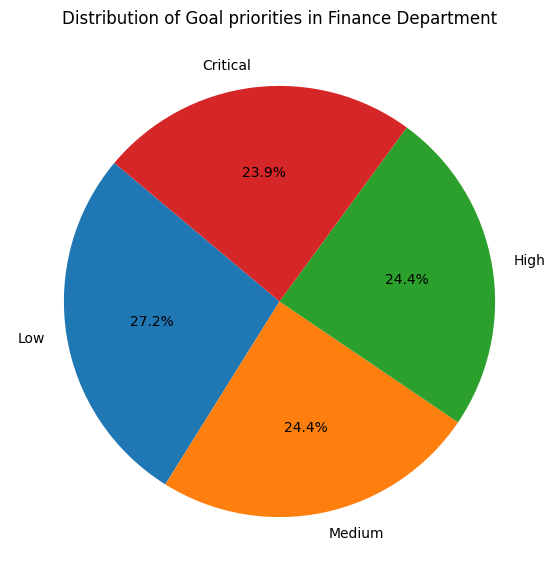

In [9]:
import matplotlib.pyplot as plt

# Filter data for the Finance department
finance_goals = goal_data[goal_data['department'] == 'Finance']

# Count the occurrence of each category in the Finance department
category_counts = finance_goals['priority'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goal priorities in Finance Department')
plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "There is a uniform distribution of goal priorities in the Finance department",
    "insight_value": {
        "Critical": "23.9%",
        "High": "24.4%",
        "Medium": "24.4%",
        "Low": "27.2%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Goal Priorities in the Finance Department",
        "x_axis": {
            "name": "Priority Level",
            "value": "Critical, High, Medium, Low",
            "description": "This represents the different priority levels assigned to goals within the Finance department."
        },
        "y_axis": {
            "name": "Percentage of Goals",
            "value": "mean is 25% across all priorities",
            "description": "This shows the percentage of goals classified under each priority level, indicating an even distribution across priorities."
        },
        "description": "The bar graph illustrates a uniform distribution of goal priorities within the Finance department, with each priority level—Critical, High, Medium, and Low—comprising 25% of goals. This even distribution suggests that the variation in goal durations and success rates may more likely be influenced by factors related to goal category rather than priority."
    },
    "question": "What is the distribution of Goal priorities in the Finance department?",
    "actionable_insight": "Given the uniform distribution of priorities, further analysis should focus on goal categories to uncover potential factors influencing goal durations and success rates in the Finance department. Understanding how different categories impact goal outcomes could provide strategic insights into effective goal management and resource allocation."
}


{'data_type': 'diagnostic',
 'insight': 'There is a uniform distribution of goal priorities in the Finance department',
 'insight_value': {'Critical': '23.9%',
  'High': '24.4%',
  'Medium': '24.4%',
  'Low': '27.2%'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Goal Priorities in the Finance Department',
  'x_axis': {'name': 'Priority Level',
   'value': 'Critical, High, Medium, Low',
   'description': 'This represents the different priority levels assigned to goals within the Finance department.'},
  'y_axis': {'name': 'Percentage of Goals',
   'value': 'mean is 25% across all priorities',
   'description': 'This shows the percentage of goals classified under each priority level, indicating an even distribution across priorities.'},
  'description': 'The bar graph illustrates a uniform distribution of goal priorities within the Finance department, with each priority level—Critical, High, Medium, and Low—comprising 25% of goals. This even distribution suggests that the v

### Summary of Findings (Flag 34)

1. **Efficiency in Goal Completion**: The dataset highlights a significant trend where 'Cost Reduction' goals within the Finance department are completed in notably shorter durations compared to other departments such as HR, Marketing, and IT. Additionally, tasks initiated in Q4 across all departments exhibit higher completion percentages, indicating a potential seasonal boost in performance.

2. **Concentration of Goals in Finance**: The Finance department not only hosts a higher count of 'Cost Reduction' goals but also demonstrates a focused and efficient approach to achieving these goals. This department consistently completes goals quicker than others, especially during Q4, suggesting strategic timing and resource allocation.

3. **Uniform Goal Prioritization**: Despite the observed temporal performance variation and the variance in completion times, the distribution of goal priorities within the Finance department remains uniform. This indicates a consistent operational strategy across different priority levels, irrespective of the timing or seasonal trends.